In [2]:
import pandas as pd
import causalpy as cp
import matplotlib.pyplot as plt

In [6]:

COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000',
    '#EC9704'
]


In [3]:
data = pd.read_csv('./data/gt_social_media_data.csv')

In [4]:
data.head()

,date,twitter,linkedin,tiktok,instagram
0,2022-05-15,55,9,23,59
1,2022-05-16,54,18,20,59
2,2022-05-17,54,20,23,57
3,2022-05-18,54,20,21,55
4,2022-05-19,49,23,21,52


In [5]:
data.index = pd.to_datetime(data['date'])
data = data.drop('date', axis=1)

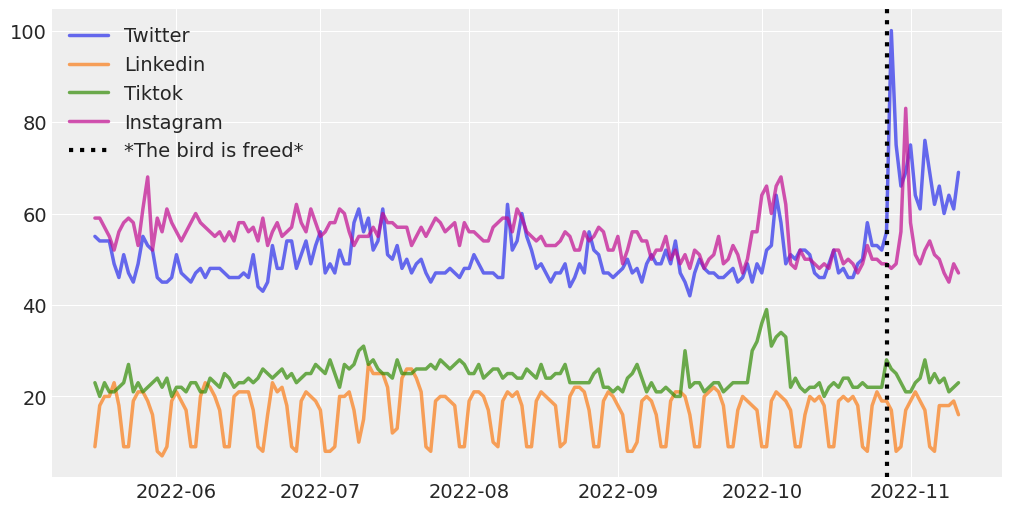

In [7]:
plt.figure(figsize=(10, 5))

for i, series in enumerate(data.columns):
    plt.plot(data[series], label=series.title(), lw=2.5, alpha=.7)
    
plt.axvline(pd.to_datetime('2022-10-27'), color='black', lw=3, ls='dotted', label='*The bird is freed*')
plt.legend()
plt.show()


In [10]:
treatment_index = pd.to_datetime('2022-10-28')

model = cp.pymc_models.WeightedSumFitter()

formula = 'twitter ~ 0 + tiktok + linkedin + instagram'

results = cp.pymc_experiments.SyntheticControl(
    data,
    treatment_index,
    formula=formula,
    model=model,
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
/Users/kakao/.pyenv/versions/3.9.15/envs/causality-study/lib/python3.9/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


(<Figure size 700x800 with 3 Axes>,
 array([<Axes: title={'center': '\n            Pre-intervention Bayesian $R^2$: 0.385\n            (std = 0.020)\n            '}>,
        <Axes: title={'center': 'Causal Impact'}>,
        <Axes: title={'center': 'Cumulative Causal Impact'}>], dtype=object))

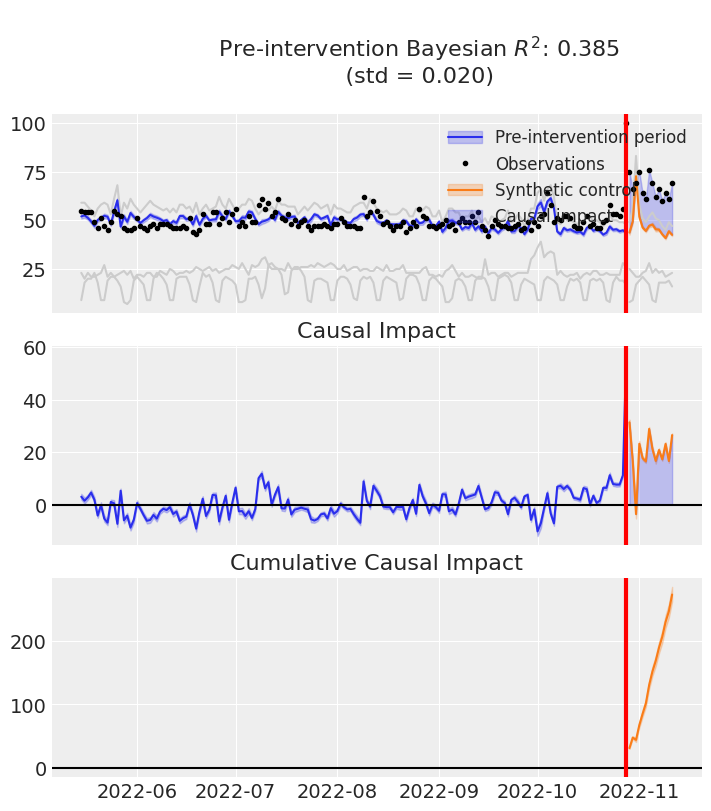

In [11]:
results.plot(plot_predictors=True)

- treatment 이전에 다른 변수들이 `twitter`를 설명하는 정도가 $R^2=0.385$정도 이다. (그리 높지는 않은 수치 같다)
- sysnthetic control 을 이용하여 구한 causal impact를 확인할 수 있다.
- treatment가 확실히 효과가 있다고 생각할 수 있다.  

In [12]:
results.summary()

===============================Synthetic Control================================
Formula: twitter ~ 0 + tiktok + linkedin + instagram
Model coefficients:
tiktok                        0.08, 94% HDI [0.01, 0.17]
linkedin                      0.08, 94% HDI [0.01, 0.15]
instagram                     0.84, 94% HDI [0.81, 0.87]
sigma                         5.78, 94% HDI [5.30, 6.31]
